<h1>Detection of Myers-Briggs Personality Type via Twitter posts</h1>

The Myers-Briggs type indicator (MBTI) represents a type of psychological assessment that helps people to understand themselves better and determine where they stand across 4 axes: Introversion (I) - Extroversion (E), Intuition (N) - Sensing (S), Thinking (T) - Feeling (F), Judging (J) - Perceiving (P). The MBTI assessments usually consists of 93 multiple-choice questions. However, psychology research shows that personality traits can be highly correlated with linguistic behavior. Therefore, the aim of this project is to develop a web application that could assign MBTI based on a client's 50 last Twitter posts based on a corpus of 1.2M English tweets annotated with Myers-Briggs personality types, gender, and user statistics.

<h2>Table of Contents</h2>
<ol>
    <li><a href="#description" style="text-transform: uppercase;">Description</a></li>
    <li><a href="#wrang" style="text-transform: uppercase;">Data Wrangling</a></li>
    <li><a href="#explore" style="text-transform: uppercase;">Data Exploration</a>
        <ol>
            <li><a href="#mbti">MBTI Type</a></li>
            <li><a href="#i_e">Introversion vs Extroversion</a></li>
            <li><a href="#n_s">Intuition vs Sensing</a></li>
            <li><a href="#t_f">Thinking vs Feeling</a></li>
            <li><a href="#j_p">Judging vs Perceiving</a></li>
            <li><a href="#follow">Follower Count</a>
                <ol>
                    <li><a href="#mf">Number of followers by MBTI</a></li>
                    <li><a href="#gf">Number of followers by Gender</a></li>
                    <li><a href="#pf">Number of followers by Personality Trait</a></li>
                </ol>
            </li>
            <li><a href="#status">Statuses Count</a>
                <ol>
                    <li><a href="#ms">Number of statuses by MBTI</a></li>
                    <li><a href="#gs">Number of statuses by Gender</a></li>
                    <li><a href="#ps">Number of statuses by Personality Trait</a></li>
                </ol>
            </li>
            <li><a href="#fav">Favorites Count</a>
                <ol>
                    <li><a href="#mfav">Number of favorites by MBTI</a></li>
                    <li><a href="#gfav">Number of favorites by Gender</a></li>
                    <li><a href="#pfav">Number of favorites by Personality Trait</a></li>
                </ol>
            </li>
            <li><a href="#list">Listed Count</a>
                <ol>
                    <li><a href="#ml">Number of lists by MBTI</a></li>
                    <li><a href="#gl">Number of lists by Gender</a></li>
                    <li><a href="#pl">Number of lists by Personality Trait</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <li><a href="#stats" style="text-transform: uppercase;">Statistical Analysis</a></li>
</ol>

<h2><a id="description" style="color: black;">Description</a></h2>

The dataset is available at https://bitbucket.org/bplank/wassa2015 (compiled by Plank B. and Hovy D., "Personality Traits on Twitter or How to Get 1,500 Personality Tests in a Week"). Even though the data for the corpus consists of multiple files with varying lengths of twitter messages obtained, the file with the highest number of tweets (approximately 2000 tweets/user) was used in the analysis. The columns in the original data set were united with the additional user information contained in meta-files. Below is the list of columns available for analysis.

<table>
    <tr style="text-align: center; border-bottom: 1px solid black; background-color: white;">
        <th style="text-align: left; font-size: 14px;">column name</th>
        <th style="text-align: left; font-size: 14px;">description</th>
        <th style="text-align: left; font-size: 14px;">type of user information</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">MBTI</th>
        <th style="text-align: left; font-size: 14px;">user's Myers-Briggs personality type</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">Gender</th>
        <th style="text-align: left; font-size: 14px;">user's gender (M or F)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">Tweet_num</th>
        <th style="text-align: left; font-size: 14px;">Number of tweets available for the user</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">Tweets</th>
        <th style="text-align: left; font-size: 14px;">Up to 2000 tweets published by the user</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">followers_count</th>
        <th style="text-align: left; font-size: 14px;">user's number of followers</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">statuses_count</th>
        <th style="text-align: left; font-size: 14px;">number of tweets (including retweets) issued by the user</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">favorites_count</th>
        <th style="text-align: left; font-size: 14px;">user's number of favorites (tweets liked by the user)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">listed_count</th>
        <th style="text-align: left; font-size: 14px;">the number of public lists that the user is a member of</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">profile_background_color</th>
        <th style="text-align: left; font-size: 14px;">The hexadecimal color chosen by the user for their background</th>
        <th style="text-align: left; font-size: 14px;">additional</th>
    </tr>
</table>

<h2><a id="wrang" style="color: black;">Data Wrangling</a></h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
dataset = pd.read_csv("1000g.all",sep="\t")

In [3]:
dataset.columns = ['MBTI','Gender','Tweet_num','Tweets']

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
MBTI         1499 non-null object
Gender       1499 non-null object
Tweet_num    1499 non-null int64
Tweets       1499 non-null object
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [5]:
dataset.MBTI.value_counts()

INFJ    257
INTJ    193
INFP    175
ENFP    148
INTP    111
ENFJ    105
ENTJ    102
ISFJ     77
ISTJ     75
ENTP     70
ISFP     51
ESFJ     36
ESTJ     36
ESFP     26
ISTP     22
ESTP     15
Name: MBTI, dtype: int64

In [6]:
dataset_2000 = pd.read_csv("2000g.all",sep="\t")
dataset_2000.columns = ['MBTI','Gender','Tweet_num','Tweets']
dataset_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
MBTI         1499 non-null object
Gender       1499 non-null object
Tweet_num    1499 non-null int64
Tweets       1499 non-null object
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [7]:
dataset_2000.head(5)

,MBTI,Gender,Tweet_num,Tweets
0,ENFJ,f,1606,say what ? this weekend has been full of surpr...
1,ENFJ,m,1810,daaamn ru was so mad .... @URL / cv9vzqrtjk da...
2,ENFJ,f,1855,"in all , i may have slept an uninterrupted 45 ..."
3,ENFJ,f,100,that tumblr post comparing louis ' laugh to a ...
4,ENFJ,f,1508,rt @USER : and those people are not the religi...


In [8]:
dataset.head(5)

,MBTI,Gender,Tweet_num,Tweets
0,ENFJ,f,998,say what ? this weekend has been full of surpr...
1,ENFJ,m,1000,daaamn ru was so mad .... @URL / cv9vzqrtjk da...
2,ENFJ,f,999,"in all , i may have slept an uninterrupted 45 ..."
3,ENFJ,f,100,that tumblr post comparing louis ' laugh to a ...
4,ENFJ,f,1000,rt @USER : and those people are not the religi...


In [9]:
meta_2000 = pd.read_csv("2000meta.all",sep="\t")
meta_2000.columns = ["followers_count","statuses_count","favorites_count","listed_count","profile_background_color"]

In [10]:
meta_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 5 columns):
followers_count             1499 non-null object
statuses_count              1499 non-null object
favorites_count             1499 non-null object
listed_count                1499 non-null object
profile_background_color    1499 non-null object
dtypes: object(5)
memory usage: 58.6+ KB


In [11]:
def del_col_name(string,df):
    str_to_replace = string + '='
    df = df.replace(str_to_replace,'',regex=True)
    return df

def int_conversion(col,df):
    df[col] = df[col].astype(int)
    return df

In [12]:
for col_name in meta_2000.columns:
    meta_2000 = del_col_name(col_name,meta_2000)
    if (col_name != 'profile_background_color'):
        meta_2000 = int_conversion(col_name, meta_2000)

In [13]:
meta_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 5 columns):
followers_count             1499 non-null int64
statuses_count              1499 non-null int64
favorites_count             1499 non-null int64
listed_count                1499 non-null int64
profile_background_color    1499 non-null object
dtypes: int64(4), object(1)
memory usage: 58.6+ KB


In [14]:
mbti_corpus = pd.concat([dataset_2000,meta_2000],axis=1)

In [15]:
mbti_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
MBTI                        1499 non-null object
Gender                      1499 non-null object
Tweet_num                   1499 non-null int64
Tweets                      1499 non-null object
followers_count             1499 non-null int64
statuses_count              1499 non-null int64
favorites_count             1499 non-null int64
listed_count                1499 non-null int64
profile_background_color    1499 non-null object
dtypes: int64(5), object(4)
memory usage: 105.5+ KB


In [16]:
mbti_corpus.isnull().sum()

MBTI                        0
Gender                      0
Tweet_num                   0
Tweets                      0
followers_count             0
statuses_count              0
favorites_count             0
listed_count                0
profile_background_color    0
dtype: int64

<h2><a id="explore" style="color: black;">Data Exploration</a></h2>

<h3><a id="mbti" style="color: black;">MBTI types</a></h3>

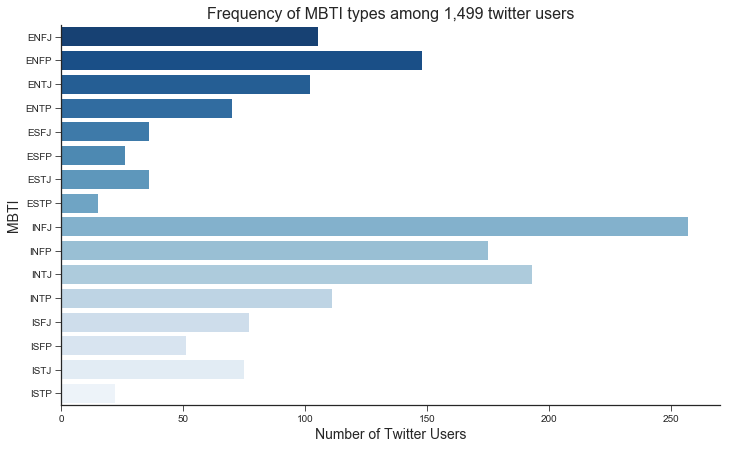

In [17]:
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.countplot(data=mbti_corpus, y='MBTI', color='magenta', palette="Blues_r",order=cols)
sns.despine()
plt.xlabel('Number of Twitter Users', fontsize=14)
plt.ylabel('MBTI', fontsize=14)
plt.title('Frequency of MBTI types among 1,499 twitter users', fontsize=16)
plt.show()

<h3><a id="i_e" style="color: black;">Introversion vs. Extroversion</a></h3>

In [18]:
table = pd.DataFrame(index=['I-E','N-S','T-F','J-P'],columns=['Total','Female','Male'])

In [19]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[0] == 'I']), len(mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'])]
label = ['General','Female','Male']
result = [0,1,2]

In [20]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [21]:
num_female = [len(female[female.MBTI.str[0] == 'I']), len(female[female.MBTI.str[0] == 'E'])]
num_male = [len(male[male.MBTI.str[0] == 'I']), len(male[male.MBTI.str[0] == 'E'])]

In [22]:
raw_data = {'Introverts': [i_e[0],num_female[0],num_male[0]],'Extroverts':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [23]:
totals = [i+k for i,k in zip(df['Introverts'],df['Extroverts'])]
introverts = [i*100/j for i,j in zip(df['Introverts'],totals)]
extroverts = [i*100/j for i,j in zip(df['Extroverts'],totals)]

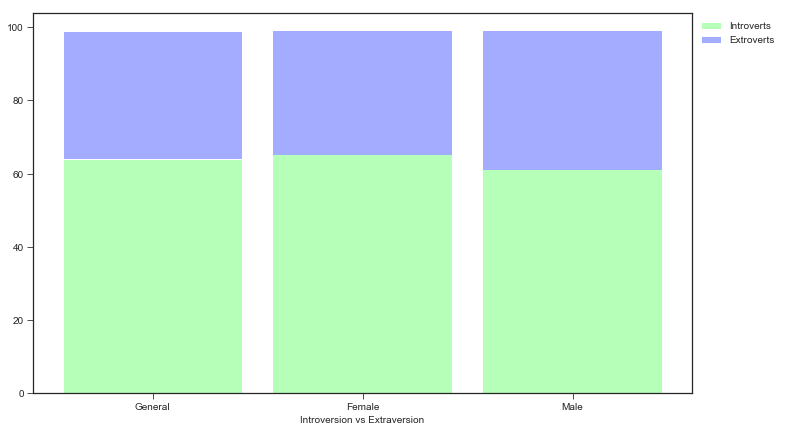

In [24]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, introverts, color='#b5ffb9',edgecolor='white',width=barWidth,label='Introverts')
plt.bar(result, extroverts, color='#a3acff',bottom=introverts,edgecolor='white',width=barWidth,label='Extroverts')
plt.xticks(result, label)
plt.xlabel('Introversion vs Extraversion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [25]:
total = 1499
table['Total'][0] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][0] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][0] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3><a id="n_s" style="color: black;">Intuition vs. Sensing</a></h3>

In [26]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[1] == 'N']), len(mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'])]
label = ['General','Female','Male']
result = [0,1,2]

In [27]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [28]:
num_female = [len(female[female.MBTI.str[1] == 'N']), len(female[female.MBTI.str[1] == 'S'])]
num_male = [len(male[male.MBTI.str[1] == 'N']), len(male[male.MBTI.str[1] == 'S'])]

In [29]:
raw_data = {'Intuitive': [i_e[0],num_female[0],num_male[0]],'Sensing':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [30]:
totals = [i+k for i,k in zip(df['Intuitive'],df['Sensing'])]
intuit = [i*100/j for i,j in zip(df['Intuitive'],totals)]
sense = [i*100/j for i,j in zip(df['Sensing'],totals)]

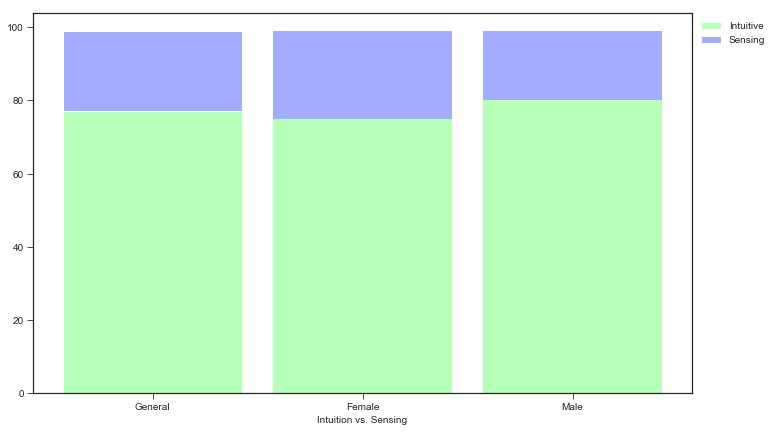

In [31]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, intuit, color='#b5ffb9',edgecolor='white',width=barWidth,label='Intuitive')
plt.bar(result, sense, color='#a3acff',bottom=intuit,edgecolor='white',width=barWidth,label='Sensing')
plt.xticks(result, label)
plt.xlabel('Intuition vs. Sensing')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [32]:
table['Total'][1] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][1] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][1] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3><a id="t_f" style="color: black;">Thinking vs. Feeling</a></h3>

In [33]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[2] == 'T']), len(mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'])]
label = ['General','Female','Male']
result = [0,1,2]

In [34]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [35]:
num_female = [len(female[female.MBTI.str[2] == 'T']), len(female[female.MBTI.str[2] == 'F'])]
num_male = [len(male[male.MBTI.str[2] == 'T']), len(male[male.MBTI.str[2] == 'F'])]

In [36]:
raw_data = {'Thinking': [i_e[0],num_female[0],num_male[0]],'Feeling':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [37]:
totals = [i+k for i,k in zip(df['Thinking'],df['Feeling'])]
think = [i*100/j for i,j in zip(df['Thinking'],totals)]
feel = [i*100/j for i,j in zip(df['Feeling'],totals)]

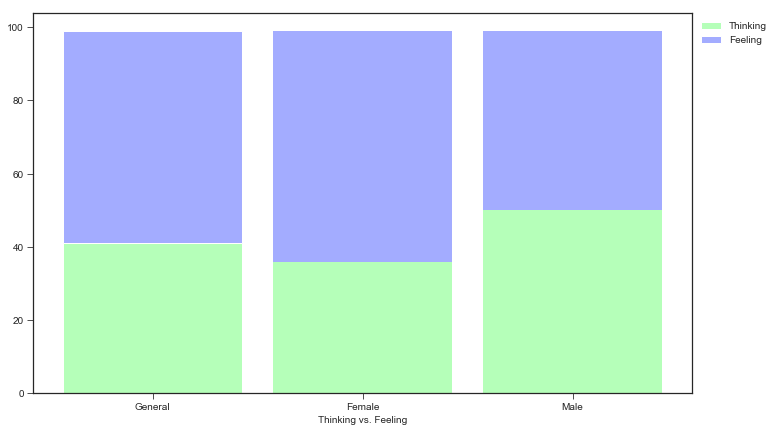

In [38]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, think, color='#b5ffb9',edgecolor='white',width=barWidth,label='Thinking')
plt.bar(result, feel, color='#a3acff',bottom=think,edgecolor='white',width=barWidth,label='Feeling')
plt.xticks(result, label)
plt.xlabel('Thinking vs. Feeling')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [39]:
table['Total'][2] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][2] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][2] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3><a id="j_p" style="color: black;">Judging vs. Prospecting</a></h3>

In [40]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[3] == 'J']), len(mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'])]
label = ['General','Female','Male']
result = [0,1,2]

In [41]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [42]:
num_female = [len(female[female.MBTI.str[3] == 'J']), len(female[female.MBTI.str[3] == 'P'])]
num_male = [len(male[male.MBTI.str[3] == 'J']), len(male[male.MBTI.str[3] == 'P'])]

In [43]:
raw_data = {'Judging': [i_e[0],num_female[0],num_male[0]],'Prospecting':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [44]:
totals = [i+k for i,k in zip(df['Judging'],df['Prospecting'])]
judge = [i*100/j for i,j in zip(df['Judging'],totals)]
prospect = [i*100/j for i,j in zip(df['Prospecting'],totals)]

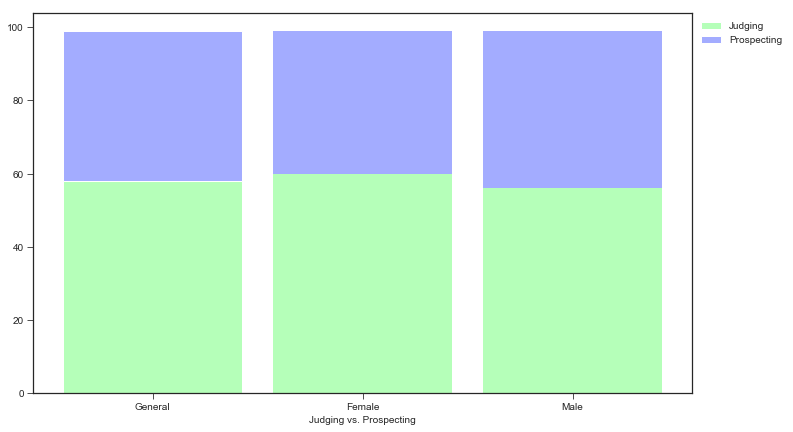

In [45]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, judge, color='#b5ffb9',edgecolor='white',width=barWidth,label='Judging')
plt.bar(result, prospect, color='#a3acff',bottom=judge,edgecolor='white',width=barWidth,label='Prospecting')
plt.xticks(result, label)
plt.xlabel('Judging vs. Prospecting')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [46]:
table['Total'][3] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][3] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][3] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

In [47]:
table

,Total,Female,Male
I-E,64% / 35%,65% / 34%,61% / 38%
N-S,77% / 22%,75% / 24%,80% / 19%
T-F,41% / 58%,36% / 63%,50% / 49%
J-P,58% / 41%,60% / 39%,56% / 43%


<h3><a id="follow" style="color: black;">Followers Count</a></h3>

<h4><a id="mf" style="color: black;">Number of followers with respect to MBTI</a></h4>

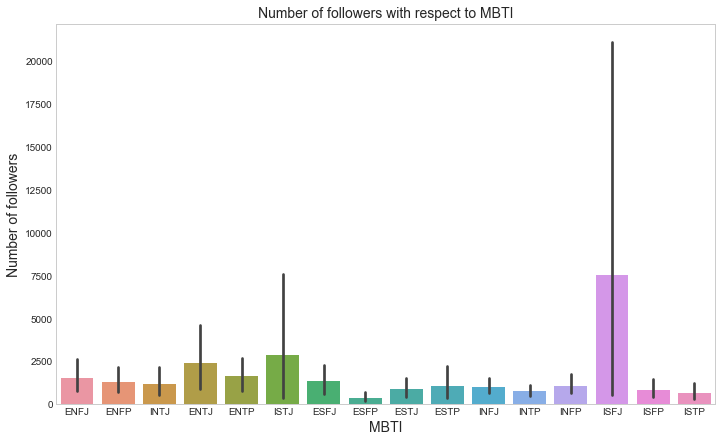

In [48]:
plt.figure(figsize=(11.8, 7))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='followers_count', data=mbti_corpus)
plt.title('Number of followers with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of followers', fontsize=14)
plt.show()

<h4><a id="gf" style="color: black;">Number of followers by Gender</a></h4>

In [49]:
female_followers = mbti_corpus[mbti_corpus.Gender == 'f'].followers_count
male_followers = mbti_corpus[mbti_corpus.Gender == 'm'].followers_count

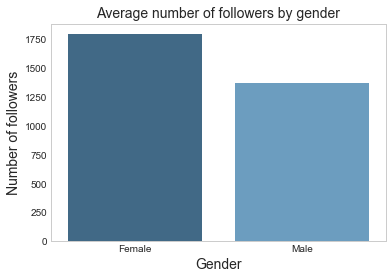

In [50]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_followers), np.mean(male_followers)], palette="Blues_d")
plt.title('Average number of followers by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of followers', fontsize=14)
plt.show()

<h4><a id="pf" style="color: black;">Number of followers by Personality Traits</a></h4>

In [51]:
introverts_followers = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].followers_count
extroverts_followers = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].followers_count
intuit_followers = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].followers_count
sense_followers = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].followers_count
think_followers = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].followers_count
feel_followers = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].followers_count
judge_followers = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].followers_count
prospect_followers = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].followers_count

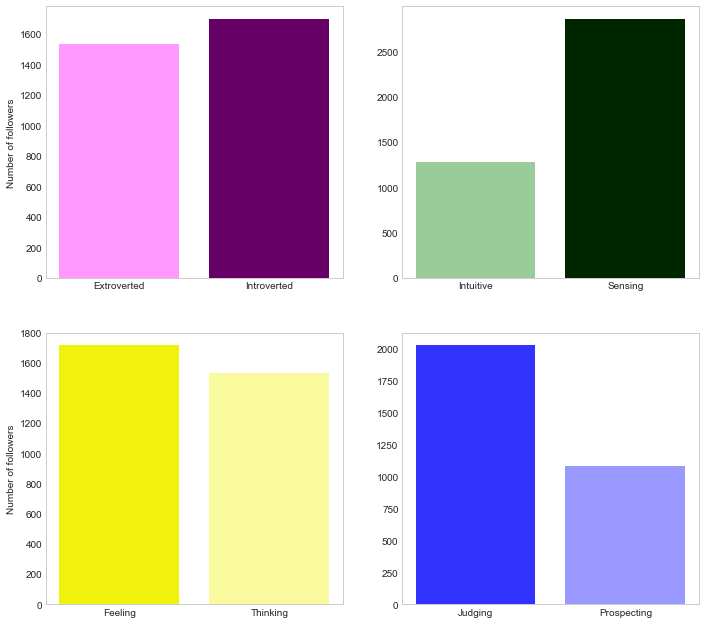

In [52]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_followers),np.mean(extroverts_followers)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_followers),np.mean(sense_followers)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_followers),np.mean(feel_followers)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_followers),np.mean(prospect_followers)], color=['#3232ff','#9999ff'])
ax1.set_ylabel('Number of followers')
ax3.set_ylabel('Number of followers')
plt.show()

<h3><a id="status" style="color: black;">Statuses count</a></h3>

<h4><a id="ms" style="color: black;">Number of statuses with respect to MBTI</a></h4>

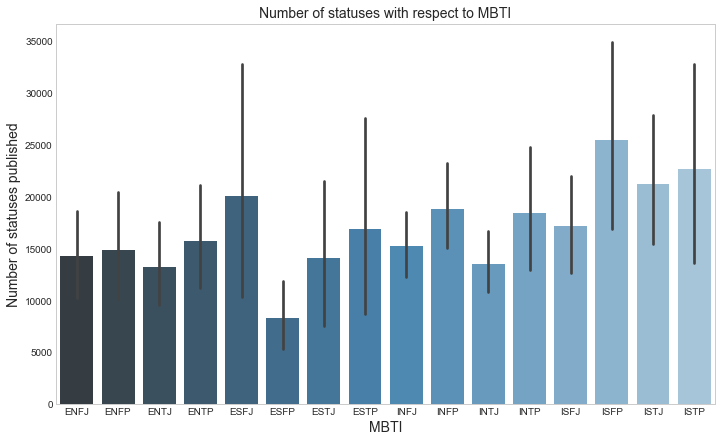

In [53]:
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='statuses_count', data=mbti_corpus,order=cols,palette="Blues_d")
plt.title('Number of statuses with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of statuses published', fontsize=14)
plt.show()

<h4><a id="gs" style="color: black;">Number of statuses published by Gender</a></h4>

In [54]:
female_status = mbti_corpus[mbti_corpus.Gender == 'f'].statuses_count
male_status = mbti_corpus[mbti_corpus.Gender == 'm'].statuses_count

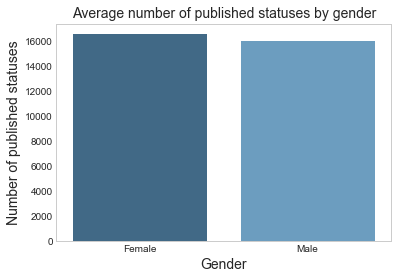

In [55]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_status), np.mean(male_status)], palette="Blues_d")
plt.title('Average number of published statuses by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of published statuses', fontsize=14)
plt.show()

<h4><a id="ps" style="color: black;">Number of statuses published by personality traits</a></h4>

In [56]:
introverts_status = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].statuses_count
extroverts_status = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].statuses_count
intuit_status = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].statuses_count
sense_status = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].statuses_count
think_status = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].statuses_count
feel_status = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].statuses_count
judge_status = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].statuses_count
prospect_status = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].statuses_count

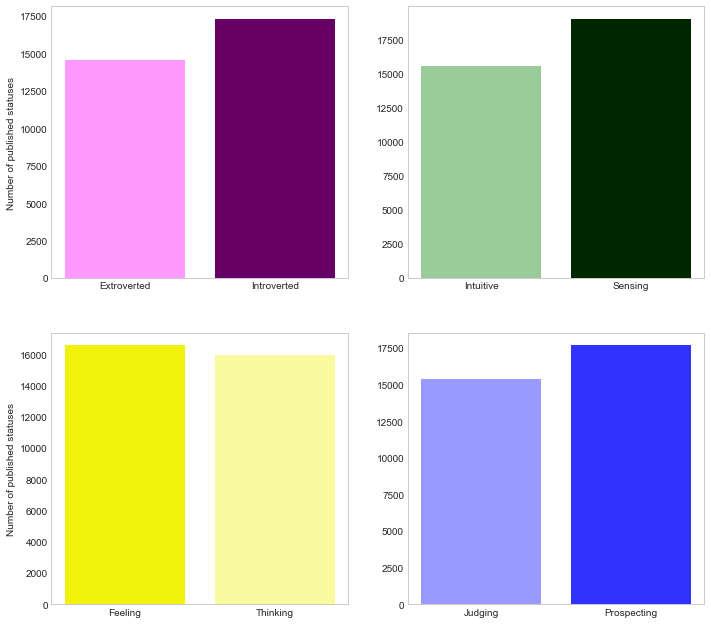

In [57]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_status),np.mean(extroverts_status)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_status),np.mean(sense_status)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_status),np.mean(feel_status)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_status),np.mean(prospect_status)], color=['#9999ff','#3232ff'])
ax1.set_ylabel('Number of published statuses')
ax3.set_ylabel('Number of published statuses')
plt.show()

<h3><a id="fav" style="color: black;">Favorites Count</a></h3>

<h4><a id="mfav" style="color: black;">Favorites count with respect to MBTI</a></h4>

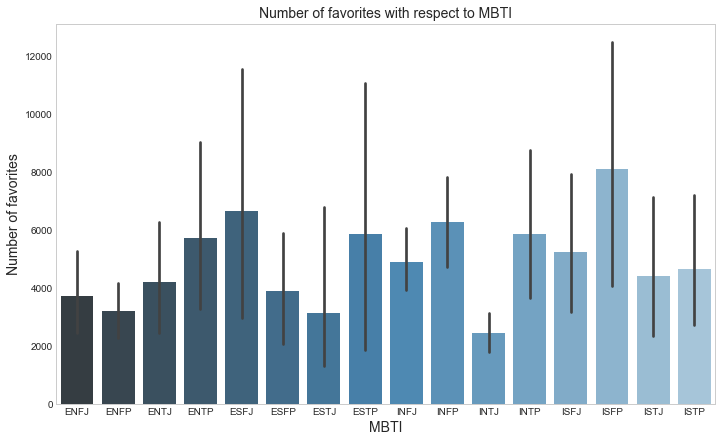

In [58]:
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='favorites_count', data=mbti_corpus,order=cols,palette="Blues_d")
plt.title('Number of favorites with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of favorites', fontsize=14)
plt.show()

<h4><a id="gfav" style="color: black;">Number of favorites by Gender</a></h4>

In [59]:
female_fav = mbti_corpus[mbti_corpus.Gender == 'f'].favorites_count
male_fav = mbti_corpus[mbti_corpus.Gender == 'm'].favorites_count

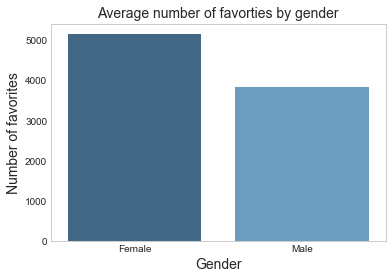

In [60]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_fav), np.mean(male_fav)], palette="Blues_d")
plt.title('Average number of favorties by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of favorites', fontsize=14)
plt.show()

<h4><a id="pfav" style="color: black;">Number of favorites by personality traits</a></h4>

In [61]:
introverts_fav = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].favorites_count
extroverts_fav = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].favorites_count
intuit_fav = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].favorites_count
sense_fav = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].favorites_count
think_fav = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].favorites_count
feel_fav = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].favorites_count
judge_fav = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].favorites_count
prospect_fav = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].favorites_count

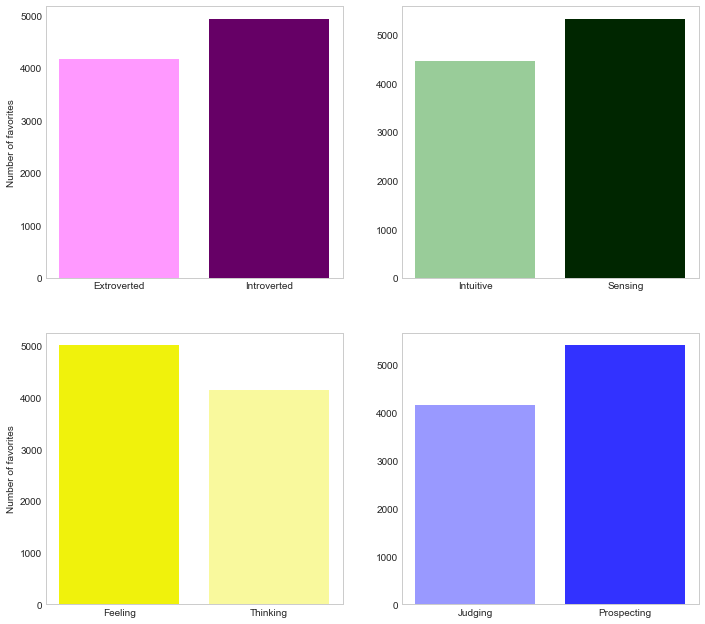

In [62]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_fav),np.mean(extroverts_fav)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_fav),np.mean(sense_fav)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_fav),np.mean(feel_fav)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_fav),np.mean(prospect_fav)], color=['#9999ff','#3232ff'])
ax1.set_ylabel('Number of favorites')
ax3.set_ylabel('Number of favorites')
plt.show()

<h3><a id="list" style="color: black;">Listed Count</a></h3>

<h4><a id="ml" style="color: black;">Number of lists with respect to MBTI</a></h4>

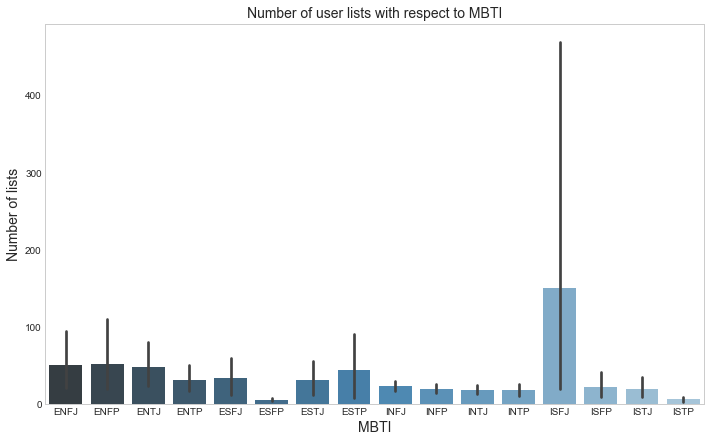

In [63]:
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='listed_count', data=mbti_corpus,order=cols,palette="Blues_d")
plt.title('Number of user lists with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of lists', fontsize=14)
plt.show()

<h4><a id="gl" style="color: black;">Number of lists by gender</a></h4>

In [64]:
female_list = mbti_corpus[mbti_corpus.Gender == 'f'].listed_count
male_list = mbti_corpus[mbti_corpus.Gender == 'm'].listed_count

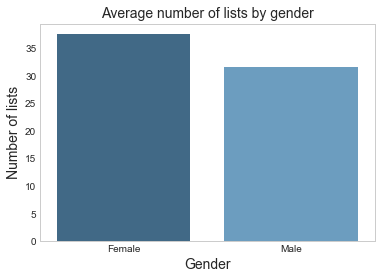

In [65]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_list), np.mean(male_list)], palette="Blues_d")
plt.title('Average number of lists by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of lists', fontsize=14)
plt.show()

<h4><a id="pl" style="color: black;">Number of lists by personality trait</a></h4>

In [66]:
introverts_ls = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].listed_count
extroverts_ls = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].listed_count
intuit_ls = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].listed_count
sense_ls = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].listed_count
think_ls = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].listed_count
feel_ls = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].listed_count
judge_ls = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].listed_count
prospect_ls = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].listed_count

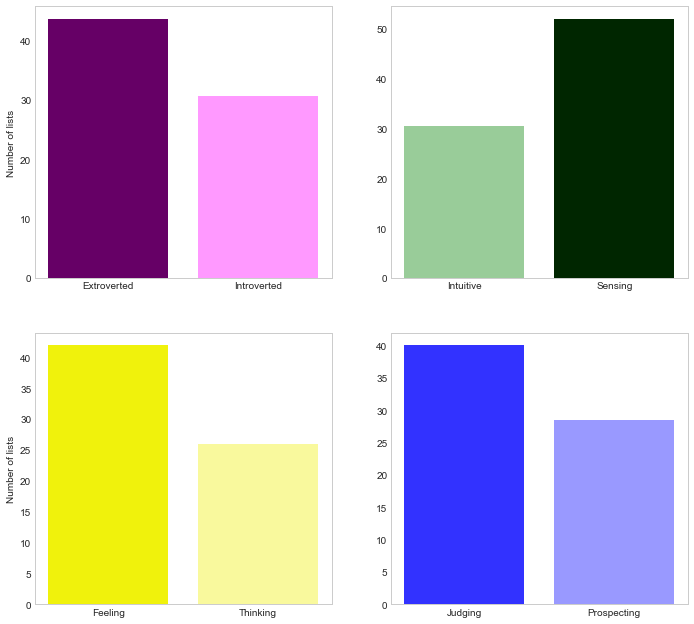

In [67]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_ls),np.mean(extroverts_ls)], color=['#ff99ff','#660066'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_ls),np.mean(sense_ls)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_ls),np.mean(feel_ls)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_ls),np.mean(prospect_ls)], color=['#3232ff','#9999ff'])
ax1.set_ylabel('Number of lists')
ax3.set_ylabel('Number of lists')
plt.show()

<h3>Profile Background Color</h3>

In [82]:
mbti_corpus['profile_background_color'] = '#' + mbti_corpus['profile_background_color'].astype(str)

In [194]:
color_dict = {}
for color_p in mbti_corpus.profile_background_color.value_counts().index:
    df = mbti_corpus[mbti_corpus.profile_background_color == color_p]
    color_dict[color_p] = {mbti_type: float(len(df[df.MBTI == mbti_type]))*100/float(len(mbti_corpus[mbti_corpus.MBTI == mbti_type])) for mbti_type in df.MBTI.value_counts().index}  

In [195]:
result = pd.DataFrame(color_dict)

In [196]:
result.fillna(0)

,#000000,#000047,#000205,#000508,#000800,#000908,#001500,#003300,#004466,#0099B9,...,#FFA50A,#FFAA6E,#FFCC33,#FFCC4D,#FFE8B5,#FFEEEE,#FFF04D,#FFFCF7,#FFFEFF,#FFFFFF
ENFJ,8.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.809524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.619048
ENFP,12.837838,0.000000,0.000000,0.675676,0.000000,0.000000,0.000000,0.000000,0.000000,1.351351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.432432
ENTJ,9.803922,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000,0.000000,0.000000,1.960784,...,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000,1.960784,0.000000,0.000000,4.901961
ENTP,7.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.428571,0.000000,0.000000,5.714286
ESFJ,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.777778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.777778,2.777778
ESFP,15.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.846154
ESTJ,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.777778,0.000000,0.000000,11.111111
ESTP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,13.333333
INFJ,12.451362,0.389105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.556420,...,0.000000,0.000000,0.000000,0.000000,0.389105,0.000000,1.556420,0.000000,0.000000,5.836576
INFP,14.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,1.714286,...,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,7.428571


In [215]:
arc_col = []
for col_type in result.columns:
    arc_col.append(col_type)

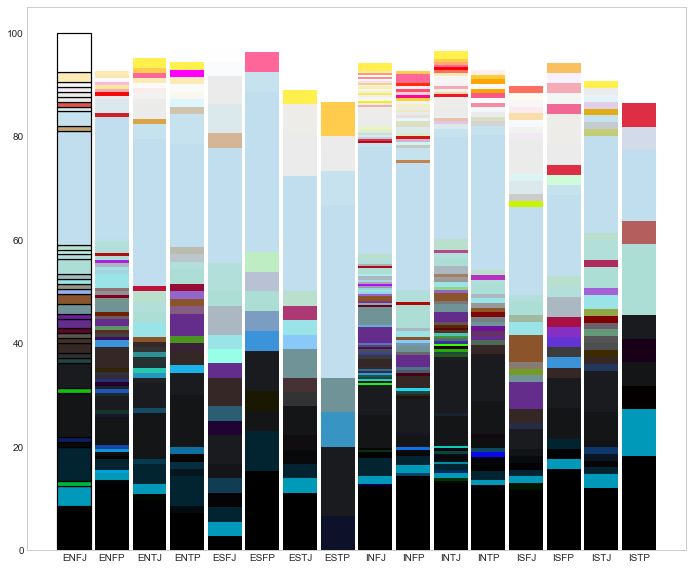

In [234]:
plt.figure(figsize=(11.8, 10))
bottom_arr = 0 
barWidth = 0.9
for col in range(0,len(arc_col)):
    bottom_arr = result.iloc[:,0:col].sum(axis=1)
    plt.bar(result.index.values, result[arc_col[col]],edgecolor='black',width=barWidth, color=arc_col[col],bottom=bottom_arr, linewidth=1.2)
plt.show()

<h4>Background color variations by gender</h4>

In [235]:
color_dict = {}
for color_p in mbti_corpus.profile_background_color.value_counts().index:
    df = mbti_corpus[mbti_corpus.profile_background_color == color_p]
    color_dict[color_p] = {gender: float(len(df[df.Gender == gender]))*100/float(len(mbti_corpus[mbti_corpus.Gender == gender])) for gender in df.Gender.value_counts().index}  

In [236]:
result = pd.DataFrame(color_dict)

In [237]:
result.fillna(0)

,#000000,#000047,#000205,#000508,#000800,#000908,#001500,#003300,#004466,#0099B9,...,#FFA50A,#FFAA6E,#FFCC33,#FFCC4D,#FFE8B5,#FFEEEE,#FFF04D,#FFFCF7,#FFFEFF,#FFFFFF
f,12.260128,0.000000,0.10661,0.10661,0.000000,0.000000,0.10661,0.000000,0.000000,1.812367,...,0.000000,0.000000,0.000000,0.426439,0.10661,0.10661,0.959488,0.10661,0.10661,7.356077
m,11.051693,0.178253,0.00000,0.00000,0.178253,0.178253,0.00000,0.178253,0.178253,1.426025,...,0.178253,0.178253,0.178253,0.000000,0.00000,0.00000,0.534759,0.00000,0.00000,5.347594


In [238]:
arc_col = []
for col_type in result.columns:
    arc_col.append(col_type)

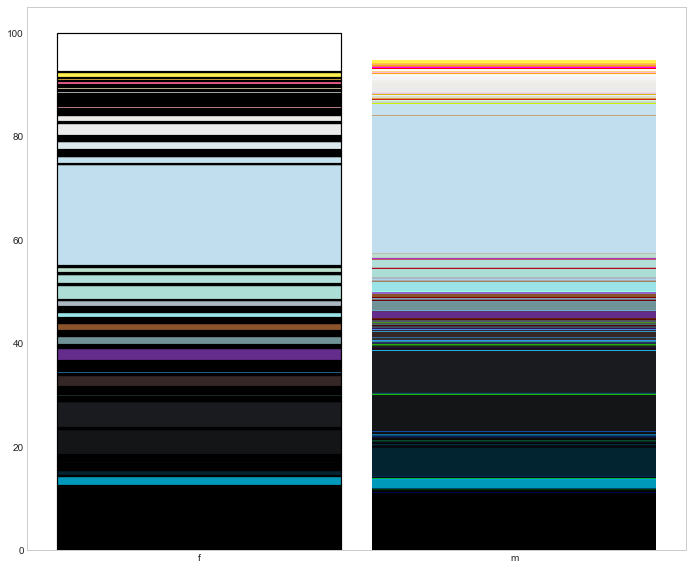

In [239]:
plt.figure(figsize=(11.8, 10))
bottom_arr = 0 
barWidth = 0.9
for col in range(0,len(arc_col)):
    bottom_arr = result.iloc[:,0:col].sum(axis=1)
    plt.bar(result.index.values, result[arc_col[col]],edgecolor='black',width=barWidth, color=arc_col[col],bottom=bottom_arr, linewidth=1.2)
plt.show()

<h4>Background color variations by personality traits</h4>

In [255]:
def color_dict(label,str_num):
    color_dict = {}
    for color_p in mbti_corpus.profile_background_color.value_counts().index:
        df = mbti_corpus[mbti_corpus.profile_background_color == color_p]
        color_dict[color_p] = {str1: float(len(df[df.MBTI.str[str_num] == str1]))*100/float(len(mbti_corpus.MBTI.str[str_num] == str1)) for str1 in label}
    result = pd.DataFrame(color_dict)
    result = result.fillna(0)
    return result

In [256]:
intro_extra = color_dict(['I','E'],0)
intuit_sense = color_dict(['N','S'],1)
think_feel = color_dict(['T','F'],2)
judge_perceive = color_dict(['J','P'],3)

In [259]:
arc_col = []
for col_type in intro_extra.columns:
    arc_col.append(col_type)

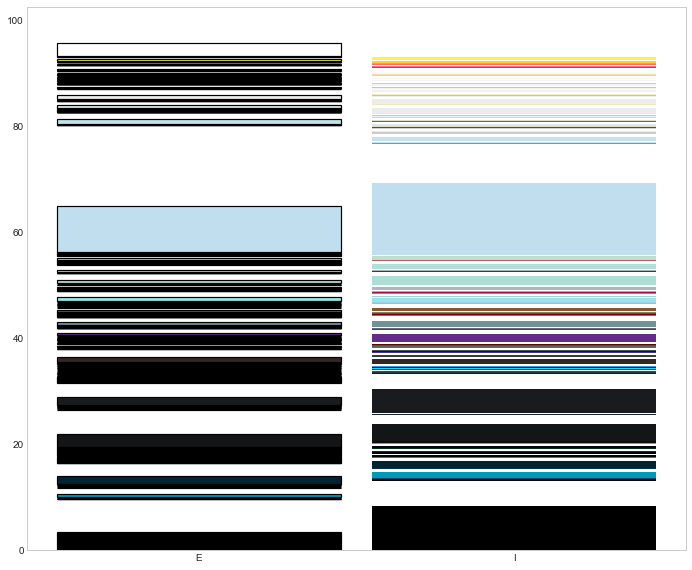

In [260]:
plt.figure(figsize=(11.8, 10))
bottom_arr = 0 
barWidth = 0.9
for col in range(0,len(arc_col)):
    bottom_arr = result.iloc[:,0:col].sum(axis=1)
    plt.bar(intro_extra.index.values, intro_extra[arc_col[col]],edgecolor='black',width=barWidth, color=arc_col[col],bottom=bottom_arr, linewidth=1.2)
plt.show()

In [261]:
intro_extra

,#000000,#000047,#000205,#000508,#000800,#000908,#001500,#003300,#004466,#0099B9,...,#FFA50A,#FFAA6E,#FFCC33,#FFCC4D,#FFE8B5,#FFEEEE,#FFF04D,#FFFCF7,#FFFEFF,#FFFFFF
E,3.468979,0.000000,0.000000,0.066711,0.066711,0.000000,0.000000,0.000000,0.000000,0.600400,...,0.000000,0.000000,0.000000,0.133422,0.000000,0.000000,0.266845,0.000000,0.066711,2.401601
I,8.338893,0.066711,0.066711,0.000000,0.000000,0.066711,0.066711,0.066711,0.066711,1.067378,...,0.066711,0.066711,0.066711,0.133422,0.066711,0.066711,0.533689,0.066711,0.000000,4.202802


In [262]:
intro_extra.iloc[0,0:346].sum()

35.8905937291528